Analysis of temperature data at station 'ACME'

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# Temperature at surface at station 'ACME: ts'
ts = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp_sfc\\ts_station.csv", header=None)
# Temperature 2m above surface at station 'ACME: t'
t = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Temp\\t_station.csv", header=None)
# minimum temperature 2m above surface at station 'ACME: mint'
mint = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Min_temp\\mint_station.csv", header=None)
# maximum temperature 2m above surface at station 'ACME: maxt'
maxt = pd.read_csv("C:\\Users\\manas\\Desktop\\Springboard\\Capstone ideas\\Solar energy\\Data\\Max_temp\\maxt_station.csv", header=None)


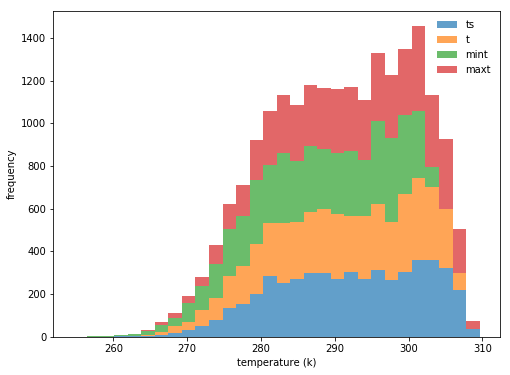

Summary statistics of temperature data:
                ts            t        min_t        max_t
count  5113.000000  5113.000000  5113.000000  5113.000000
mean    291.943878   290.941140   288.050225   292.113331
std       9.730361     9.717344     9.355779     9.653834
min     260.318799   258.286256   254.633481   259.538772
25%     284.334487   283.327246   280.731953   284.678492
50%     292.429112   291.546336   288.459987   292.722944
75%     300.569327   299.497619   296.317714   300.563230
max     309.332477   308.122303   304.629815   309.602393


In [57]:
# Histograms of all the flux to see frequency distribution from 14 years of data

plt.hist([ts[0],t[0], mint[0], maxt[0]], bins=30, stacked=True, alpha=0.7, label=['ts', 't', 'mint', 'maxt'])
leg = plt.legend()
leg.draw_frame(False)
plt.ylabel('frequency')
plt.xlabel('temperature (k)')
plt.show()

# Summary statistics of temperature data
print('Summary statistics of temperature data:')
ts_des = ts.describe()
t_des = t.describe()
mint_des = mint.describe()
maxt_des = maxt.describe()
t_stat = pd.concat([ts_des, t_des, mint_des, maxt_des], axis=1)
t_stat.columns = ['ts', 't', 'min_t', 'max_t']
print(t_stat)


Comment: The distribution is similar for all temperature variables

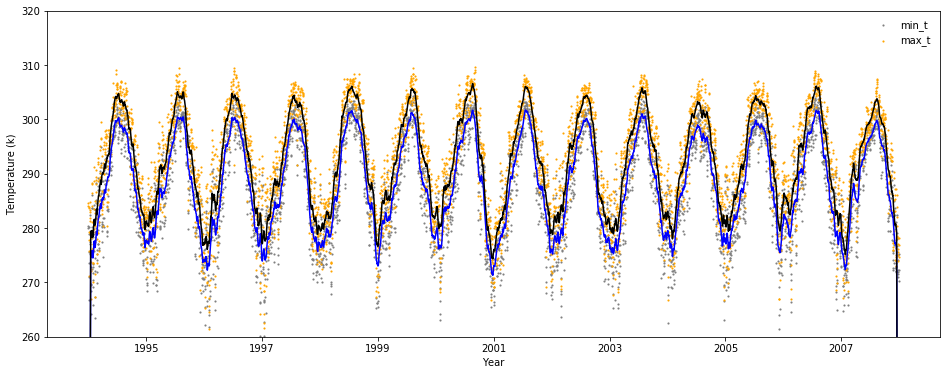

In [87]:
dates = np.arange(np.datetime64('1994-01-01'), np.datetime64('2008-01-01'))

# plot time series of temperature
# esttimating the noving average
def movingaverage(interval, window_size):
    window = np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window,'same')

x = dates
#only minimum and maximum values are pltted for better clarity
y = mint[0].values
plt.scatter(x, y, s=5, marker='.', color='gray', label='min_t')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='blue')

y = maxt[0].values
plt.scatter(x, y, s=5, marker='.', color='orange', label='max_t')
y_av = movingaverage(y, 30)
plt.plot(x, y_av, color='black')

plt.ylim(260,320)
plt.xlabel('Year')
plt.ylabel('Temperature (k)')
#plt.xticks(rotation=45)
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.rcParams["figure.figsize"] = [16,6]
plt.show()

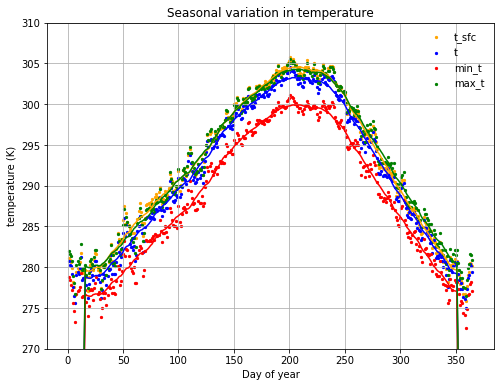

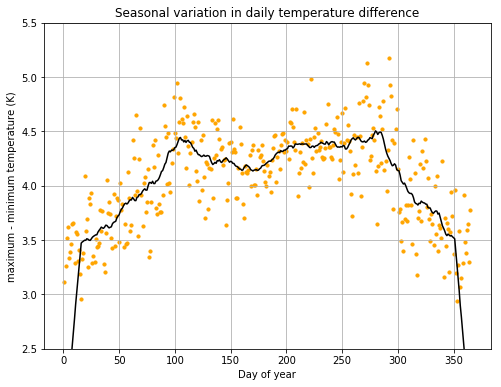

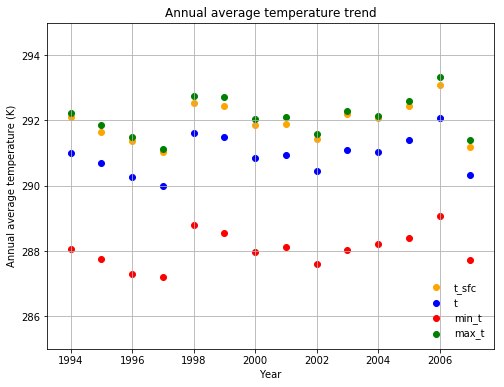

In [83]:
# for all temperature data
file = [ts, t, mint, maxt]
avg_t = pd.DataFrame()
annual_t = pd.DataFrame()
for j in range(4):
    temp = file[j]
    #Averaging temp over each day in the year: avg_t
    # Annual average of temp: annual_t
    # days in year from 1994 to 2007: leap year- 1996, 2000, 2004
    d = [365, 730, 1096, 1461, 1826, 2191, 2557, 2922, 3287, 3652, 4018, 4383, 4748, 5113]

    yr = temp[:365]

    for i in range(2007 - 1994):
        #print(d[i], d[i+1])
        yr1 = temp[d[i]:d[i+1]]
        yr1.reset_index(inplace=True, drop=True)
        yr = pd.concat([yr, yr1], axis=1)
    a = list(range(1994, 2008))
    yr = yr[:365]
    yr.columns = a

    avg_yr = yr.mean(axis=1)
    annual_avg = yr.mean(axis=0)
    #print(type(avg_yr))
    avg_t = pd.concat([avg_t, avg_yr], axis=1)
    annual_t = pd.concat([annual_t, annual_avg], axis=1)
avg_t.columns = ['ts', 't', 'mint', 'maxt']
annual_t.columns = ['ts', 't', 'mint', 'maxt']
#print(annual_rf)

# plotting the seanal variation in temperature 
days = list(range(1, 366))

plt.scatter(days, avg_t['ts'], s=5, color='orange', label='t_sfc')
plt.scatter(days, avg_t['t'], s=5, color='blue', label='t')
plt.scatter(days, avg_t['mint'], s=5, color='red', label='min_t')
plt.scatter(days, avg_t['maxt'], s=5, color='green', label='max_t')

#estimating moving average
y_av = movingaverage(avg_t['ts'], 30)
plt.plot(days, y_av, color='orange')

y_av = movingaverage(avg_t['t'], 30)
plt.plot(days, y_av, color='blue')

y_av = movingaverage(avg_t['mint'], 30)
plt.plot(days, y_av, color='red')

y_av = movingaverage(avg_t['maxt'], 30)
plt.plot(days, y_av, color='green')


plt.xlabel('Day of year')
plt.ylabel('temperature (K)')
plt.title('Seasonal variation in temperature')
leg = plt.legend(loc='upper right')
leg.draw_frame(False)
plt.ylim(270,310)
#plt.figure(figsize=(3,4))
plt.rcParams["figure.figsize"] = [8,6]
plt.grid(True)
plt.show()

# How the change in temperature (max_t - min_t) vary throughout the year
avg_t_diff = avg_t['maxt'] - avg_t['mint']
plt.scatter(days, avg_t_diff, s=10, color='orange')
plt.xlabel('Day of year')
plt.ylabel('maximum - minimum temperature (K)')
plt.title('Seasonal variation in daily temperature difference')
plt.ylim(2.5, 5.5)
y_av = movingaverage(avg_t_diff, 30)
plt.plot(days, y_av, color='black', label='t_diff_avg')
plt.grid(True)
plt.show()

# Any trend in annual average values?? Not apperant from the plot
year = list(range(1994, 2008))
plt.scatter(year, annual_t['ts'], color='orange', label='t_sfc')
plt.scatter(year, annual_t['t'], color='blue', label='t')
plt.scatter(year, annual_t['mint'], color='red', label='min_t')
plt.scatter(year, annual_t['maxt'], color='green', label='max_t')

plt.xlabel('Year')
plt.ylabel('Annual average temperature (K)')
plt.title('Annual average temperature trend')
plt.ylim(285,295)
leg = plt.legend(loc='lower right')
leg.draw_frame(False)
plt.grid(True)
plt.show()


Comment: 
figure. Seasonal variation in temperature: Temperature at surface is higher than the temperature above the surface. As expected, the temperature during summer is higher than in winter. The seasonality is pretty strong.figure. 

figure. Seasonal variation in temperature difference: The change in temperature within a day (maximum temperature - minimum temperature) is larger during spring and fall relative to winter and summer. The least change in temperature is in winter.

figure. Annual average temperature trend: The temperature trend is not so obvious from this short span. There is a sudden increase in 1998. Since 2002 there is consistent increase in temperature which again dropped in 2007.

            ts         t      mint      maxt
ts    1.000000  0.999189  0.997885  0.998523
t     0.999189  1.000000  0.999258  0.999726
mint  0.997885  0.999258  1.000000  0.999225
maxt  0.998523  0.999726  0.999225  1.000000


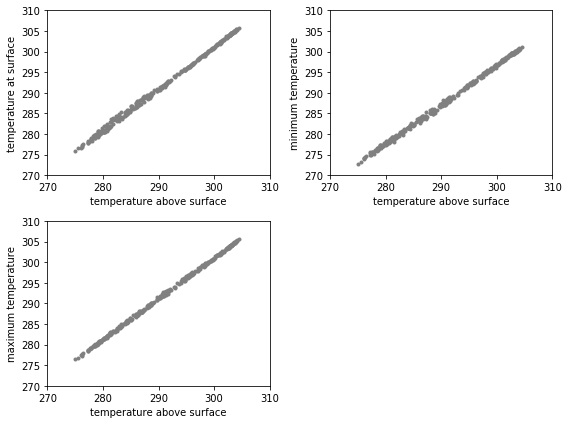

In [60]:
print(avg_t.corr())
fig = plt.figure()
plt.subplot(2,2,1)
plt.scatter(avg_t['t'], avg_t['ts'], color='gray', marker='.')
plt.xlabel('temperature above surface')
plt.ylabel('temperature at surface')
plt.ylim(270,310)
plt.xlim(270,310)

plt.subplot(2,2,2)
plt.scatter(avg_t['t'], avg_t['mint'], color='gray', marker='.')
plt.xlabel('temperature above surface')
plt.ylabel('minimum temperature')
plt.ylim(270,310)
plt.xlim(270,310)

plt.subplot(2,2,3)
plt.scatter(avg_t['t'], avg_t['maxt'], color='gray', marker='.')
plt.xlabel('temperature above surface')
plt.ylabel('maximum temperature')
plt.ylim(270,310)
plt.xlim(270,310)

plt.tight_layout()
plt.show()

Comment: The strong linear correlation among all temperature variables suggest that instead of using all of them, we can use one temperature measure (e.g., temperature above surface, t) as input for solar energy forecasting. 